In [134]:
import warnings
import itertools
import pandas as pd
import numpy as np
import sys
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [135]:
data =  pd.read_csv('C:/Users/Harish Sagadevan/Anaconda3/My Script kag/testdata.csv', header=0, parse_dates=True)
data.head(5)
data = data.set_index('Date')
print("Column headings:")
print(data.columns)
print(data.index)
data.head(5)

Column headings:
Index(['Close'], dtype='object')
Index(['11/03/2013', '12/03/2013', '13/03/2013', '14/03/2013', '15/03/2013',
       '16/03/2013', '17/03/2013', '18/03/2013', '19/03/2013', '20/03/2013',
       ...
       '13/03/2018', '14/03/2018', '15/03/2018', '16/03/2018', '17/03/2018',
       '18/03/2018', '19/03/2018', '20/03/2018', '21/03/2018', '22/03/2018'],
      dtype='object', name='Date', length=1838)


,Close
Date,
11/03/2013,30.3
12/03/2013,29.8
13/03/2013,29.9
14/03/2013,30.4
15/03/2013,31.1


In [136]:
data['Close'].replace(0, np.nan, inplace=True)
data['Close'].fillna(method='ffill', inplace=True)

#print(np.asarray(data))

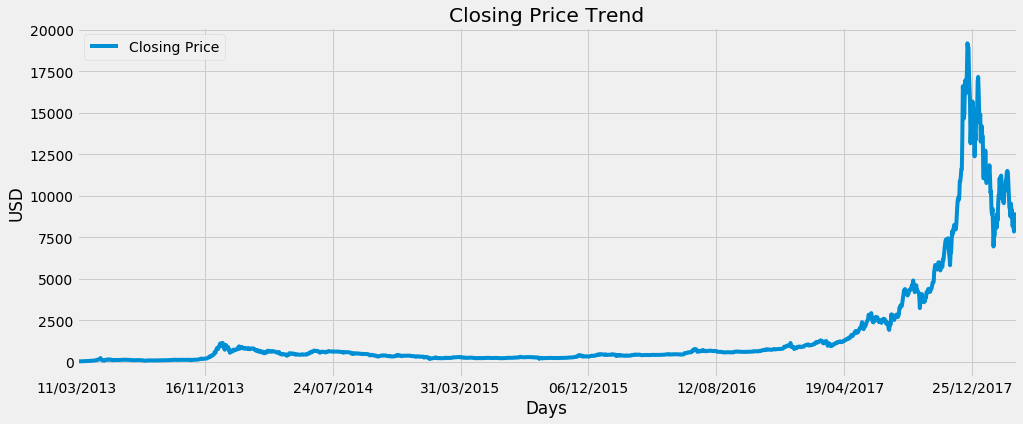

In [137]:
data['Close'].plot(figsize=(15, 6))
plt.title('Closing Price Trend')
plt.legend(['Closing Price'])
plt.ylabel('USD')
plt.xlabel('Days')
plt.show()


In [138]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [139]:
# create Series object
y = data
print(y)

              Close
Date               
11/03/2013     30.3
12/03/2013     29.8
13/03/2013     29.9
14/03/2013     30.4
15/03/2013     31.1
16/03/2013     30.9
17/03/2013     33.4
18/03/2013     34.5
19/03/2013     34.3
20/03/2013     34.5
21/03/2013     36.2
22/03/2013     40.3
23/03/2013     41.0
24/03/2013     42.0
25/03/2013     44.2
26/03/2013     46.8
27/03/2013     46.0
28/03/2013     48.4
29/03/2013     44.3
30/03/2013     46.9
31/03/2013     47.2
01/04/2013     47.0
02/04/2013     47.0
03/04/2013     47.4
04/04/2013     51.6
05/04/2013     59.1
06/04/2013     64.5
07/04/2013     70.8
08/04/2013     69.9
09/04/2013     64.3
...             ...
21/02/2018  10455.0
22/02/2018   9830.0
23/02/2018  10145.0
24/02/2018   9666.3
25/02/2018   9557.4
26/02/2018  10321.0
27/02/2018  10569.0
28/02/2018  10315.0
01/03/2018  10925.0
02/03/2018  11025.0
03/03/2018  11440.0
04/03/2018  11501.0
05/03/2018  11416.0
06/03/2018  10720.0
07/03/2018   9902.9
08/03/2018   9300.0
09/03/2018   9217.0


In [140]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y['Close'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:33008.75516272959
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:29591.367502060744
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:29787.805999760818
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:29774.16652709189
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:29606.640319209087
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:29592.473732068225
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:33747.98714514555
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:30765.766388802516
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:27932.262113198936
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:27748.2755230985
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:27956.099416216166
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:27919.89805015423
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:27775.21603996577
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:27731.850553330558
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:25003.829543377542
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:24916.33377906445
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:25019.015075881056
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:24998.61559051667
A

C:\Users\Harish Sagadevan\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:25056.198764901706
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:26370.41195888446
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:24930.92375392527
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:25021.02098110658
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:25013.323968879457
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:25677.79478939722
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:24916.311358374063
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:25170.678179777882


C:\Users\Harish Sagadevan\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:25037.45445857718
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:26306.735013206402
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:24913.074099311394
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:25018.70866592091
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:24999.164810922033
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:25664.45591130018
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:24900.49763518666
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:25169.093158910702
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:25001.774473680838
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:26407.956049001245
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:24911.82688563872
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:25004.087720458112
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:24997.003758469495
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:25700.172332250397
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:24898.954126808523
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:25137.444092726495
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:24973.231319451625
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:26289.6119354192

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9987      0.074    -13.443      0.000      -1.144      -0.853
ma.L1          0.9993      0.111      9.032      0.000       0.782       1.216
ar.S.L12      -0.0928      0.007    -13.044      0.000      -0.107      -0.079
ma.S.L12      -0.9998      0.170     -5.889      0.000      -1.333      -0.667
sigma2      5.237e+04   9192.396      5.698      0.000    3.44e+04    7.04e+04


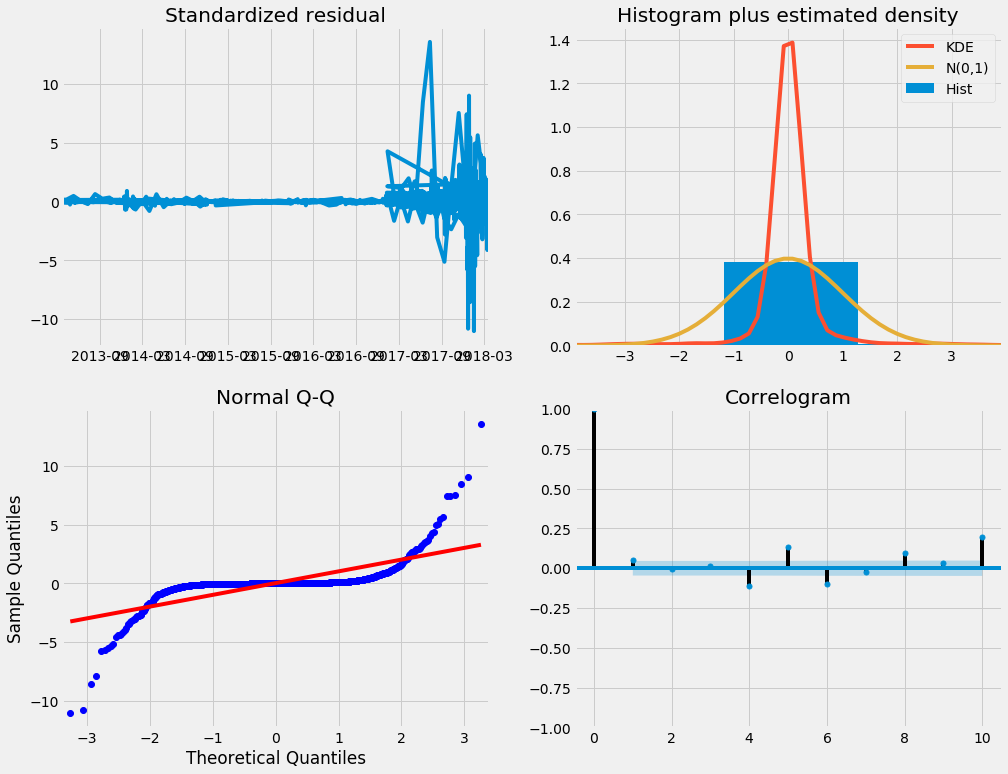

In [141]:
mod = sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

results = mod.fit()

print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [142]:
pred= results.get_prediction(start=pd.to_datetime('03/07/2017'), dynamic=False,full_results=True)
pred_ci = pred.conf_int()
data.index = pd.to_datetime(data.index)

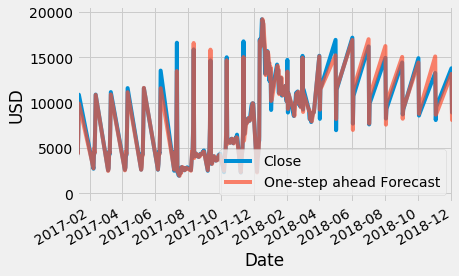

In [146]:
ax = y['03/07/2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('USD')
plt.legend()

plt.show()


In [147]:
forecasted = pred.predicted_mean
truth = data['03/07/2017':]
#print(forecasted)
#print(truth)
print(type(forecasted))
print(type(truth))
truth= pd.Series(truth['Close'])
print(type(truth))
# Compute the mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(truth, forecasted))
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
The Mean Squared Error of our forecasts is 359331.44


In [153]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('01/01/2014'), dynamic=False, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

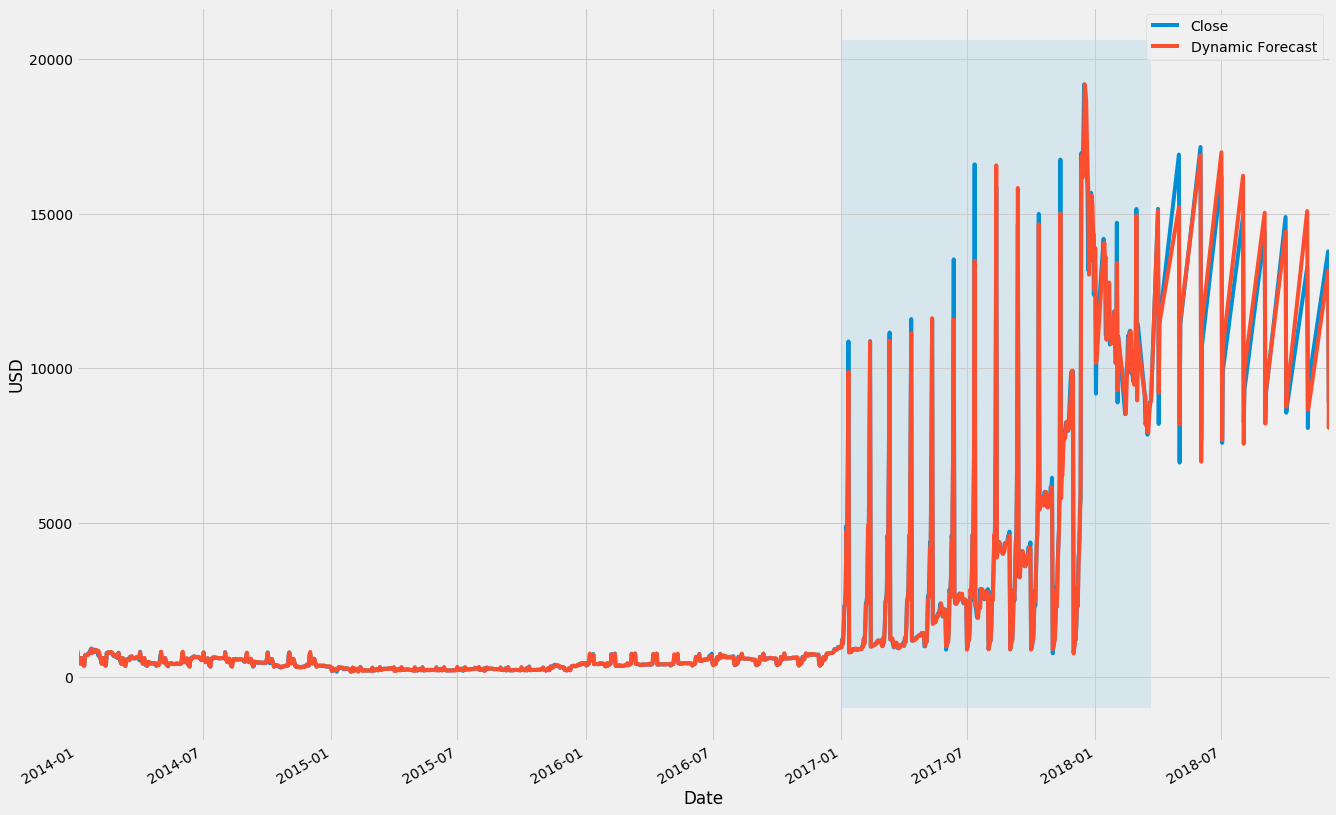

In [154]:
ax = y['01/01/2014':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('01/01/2017'), y.index[-1],alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('USD')

plt.legend()
plt.show()

In [157]:
forecasted = pred_dynamic.predicted_mean
truth = y['01/01/2014':]
truth= pd.Series(truth['Close'])
print(forecasted)
print(truth)
# Compute the mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=0
rmse = sqrt(mean_squared_error(forecasted,truth))
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

Date
2014-01-01      903.932447
2014-02-01      863.293471
2014-03-01      717.538218
2014-04-01      737.683734
2014-05-01      555.806794
2014-06-01      710.384155
2014-07-01      590.804583
2014-08-01      610.101594
2014-09-01      632.789054
2014-10-01      646.920806
2014-11-01      642.916134
2014-12-01      745.432369
2014-01-13      730.982292
2014-01-14      716.970944
2014-01-15      714.417137
2014-01-16      737.647194
2014-01-17      717.263485
2014-01-18      747.418577
2014-01-19      785.742058
2014-01-20      821.739848
2014-01-21      801.669193
2014-01-22      907.947813
2014-01-23      926.357198
2014-01-24      796.001654
2014-01-25      838.028317
2014-01-26      849.767206
2014-01-27      836.087628
2014-01-28      881.091312
2014-01-29      891.361888
2014-01-30      813.751519
                  ...     
2018-02-21    11192.482974
2018-02-22    10475.507574
2018-02-23     9872.901711
2018-02-24    10090.154378
2018-02-25     9699.131091
2018-02-26     9466.240

In [158]:
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'